<a href="https://colab.research.google.com/github/prachi732/The-Sparks-Foundation/blob/master/Task2_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK**:**2**
**TO EXPLORE SUPERVISED MACHINE LEARNING**



**Simple Linear Regression**:
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**Importing The Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##**Plotting The Dataset**

Text(0.5, 1.0, 'Hours Studied Vs Scores')

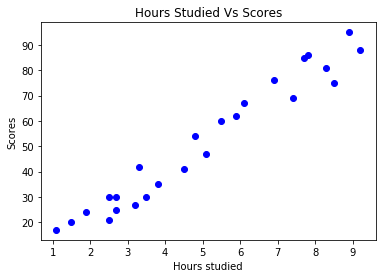

In [7]:
plt.scatter(data['Hours'],data['Scores'],color='blue')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Hours Studied Vs Scores")

Text(0.5, 1.0, 'Regression Plot')

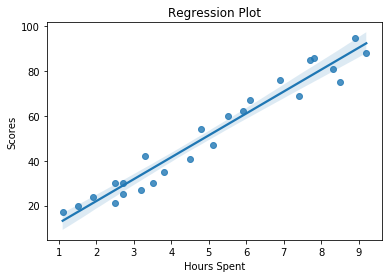

In [8]:
sns.regplot(x='Hours',y='Scores',data=data)
plt.xlabel('Hours Spent')
plt.ylabel('Scores')
plt.title('Regression Plot')

##**Analyzing Correlation and Covariance**

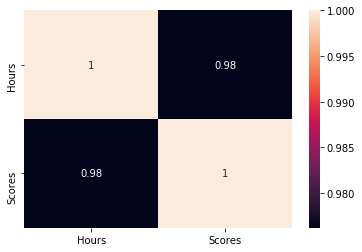

In [9]:
matrix=data.corr()
sns.heatmap(matrix,annot=True)

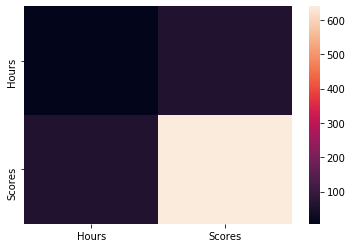

In [10]:
var=data.cov()
sns.heatmap(var)

**Data Preparation**

In [11]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(x)
print(y)





[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Training and Testing 

In [12]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.20, random_state = 0)

In [13]:
print(x_train)
print(x_test)


[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
print(y_train)
print(y_test)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[20 27 69 30 62]


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = regressor.predict(x_test)
print('Predicted data\n' , y_pred)


Predicted data
 [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


**Analyzing Predicted and Actual Values**

In [17]:
df=pd.DataFrame({'Predicted values':y_pred,'Actual values':y_test})
df

,Predicted values,Actual values
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


**Visualising The Predicted And Actual Values**

Text(0.5, 1.0, 'Training Set')

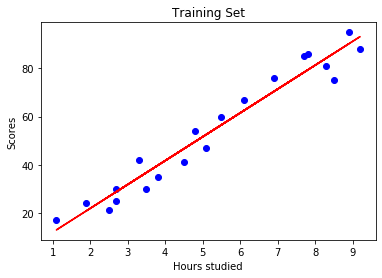

In [18]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Training Set")

Text(0.5, 1.0, 'Test Set')

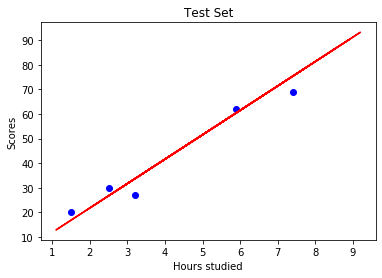

In [19]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Test Set")

Making Predictions

In [20]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


Evaluating The Model

In [21]:
from sklearn.metrics import r2_score
print("R-Squred Score is ",r2_score(y_test, y_pred))

R-Squred Score is  0.9454906892105355


In [22]:
from sklearn.metrics import mean_squared_error
print('Mean_squared_error is', mean_squared_error(y_test , y_pred))

Mean_squared_error is 21.598769307217406


In [23]:
from sklearn.metrics import mean_absolute_error
print('Mean_squared_error is', mean_absolute_error(y_test , y_pred))

Mean_squared_error is 4.183859899002975


In [24]:
print('Line Equation is y = m*',regressor.coef_,'+', regressor.intercept_)

Line Equation is y = m* [9.91065648] + 2.0181600414346974
